In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

import fitting_functions

In [2]:
traces = ['090711e_0006', '090811c_0002', '090811d_0002', '090811d_0004','091111a_0001',
          '091111a_0003','091111c_0003','091211a_0002','091211a_0005']

In [3]:
def importLongFixation(filename):
    data_file = sio.loadmat('../data/long-fixations/raw/'+filename+'_long.mat')
    trange = data_file['trange'][0][::72]
    fixation = data_file['fixation']
    fixation = fixation[::72, 0]
    return trange, fixation

## Fix artifacts

The artifact that seems to be causing the most trouble is the peak at ~30 Hz. To address this, we will normalize the coefficient of the points in the peak to the average of the X surrounding frequency bins.

In [81]:
i = 8
trange, fixation = importLongFixation(traces[i])

fft_fixation = np.fft.fft(fixation)
fft_fixation_new = np.copy(fft_fixation)
fft_freq = np.fft.fftfreq(len(trange), trange[2]-trange[1])

max_power_ind = np.argmax(np.abs(fft_fixation[len(fft_freq)//2-150:len(fft_freq)//2])**2)+len(fft_freq)//2-150

fix_window_size = 2
mean_window_size = 5

fft_fixation_new[max_power_ind-fix_window_size:max_power_ind+fix_window_size+1] *= np.mean(np.abs(np.concatenate((fft_fixation_new[max_power_ind-fix_window_size-mean_window_size:max_power_ind-fix_window_size], 
                                                                                       fft_fixation_new[max_power_ind+fix_window_size+1:max_power_ind+fix_window_size+mean_window_size+1]))))/np.abs(fft_fixation_new[max_power_ind-fix_window_size:max_power_ind+fix_window_size+1])

fft_fixation_new[-max_power_ind-fix_window_size:-max_power_ind+fix_window_size+1] *= np.mean(np.abs(np.concatenate((fft_fixation_new[-max_power_ind-fix_window_size-mean_window_size:-max_power_ind-fix_window_size+1], 
                                                                                       fft_fixation_new[-max_power_ind+fix_window_size:-max_power_ind+fix_window_size+mean_window_size+1]))))/np.abs(fft_fixation_new[-max_power_ind-fix_window_size:-max_power_ind+fix_window_size+1])


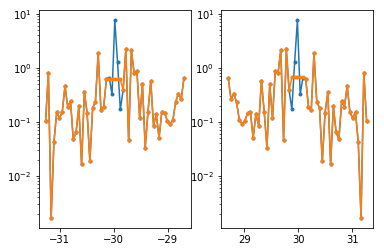

In [82]:
plot_window_size = 25

plt.subplot(1,2,1)
plt.yscale('log')
plt.plot(fft_freq[- max_power_ind - plot_window_size: - max_power_ind+plot_window_size+1], 
         np.abs(fft_fixation[- max_power_ind - plot_window_size: - max_power_ind+plot_window_size+1])**2, '.-')
plt.plot(fft_freq[- max_power_ind - plot_window_size: - max_power_ind+plot_window_size+1], 
         np.abs(fft_fixation_new[- max_power_ind - plot_window_size: - max_power_ind+plot_window_size+1])**2, '.-')


plt.subplot(1,2,2)
plt.yscale('log')
plt.plot(fft_freq[max_power_ind - plot_window_size:max_power_ind+plot_window_size+1], 
         np.abs(fft_fixation[max_power_ind - plot_window_size:max_power_ind+plot_window_size+1])**2, '.-')
plt.plot(fft_freq[max_power_ind - plot_window_size:max_power_ind+plot_window_size+1],
         np.abs(fft_fixation_new[max_power_ind - plot_window_size:max_power_ind+plot_window_size+1])**2, '.-')



In [83]:
fixation_new = np.real(np.fft.ifft(fft_fixation_new))
sio.savemat('../data/long-fixations/fixed/'+traces[i]+'_long.mat', {'trange':trange, 'fixation':fixation_new})